# Machine Learning Pipeline with Reactor data

**Course: Applied AI in Chemical and Process Engineering**

This notebook witll build a pipeline to prepare data and develop an ML algorithm

In [34]:
# Load all the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.optimize import minimize
from sklearn.impute import SimpleImputer

# Data Preperation


In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/reactor.csv')

In [36]:
# prompt: list all columns

df.columns

Index(['Temperature (°C)', 'Pressure (atm)', 'Catalyst Concentration (wt%)',
       'Feed Flow Rate (L/min)', 'Yield (%)', 'Recorded By'],
      dtype='object')

In [37]:
# Print data table
df.head(10)

,Temperature (°C),Pressure (atm),Catalyst Concentration (wt%),Feed Flow Rate (L/min),Yield (%),Recorded By
0,205.0,5.00,2.4,9.50,70.00,Nuwan
1,200.0,5.00,2.1,9.00,70.00,Mali
2,225.0,6.00,3.0,10.25,75.75,Nuwan
3,200.0,6.00,2.4,10.50,70.00,Kavi
4,220.0,6.50,3.0,9.50,95.00,Nuwan
5,210.0,4.00,4.0,11.75,73.42,Janith
6,180.0,5.00,3.1,11.25,70.00,Mali
7,190.0,4.75,4.0,9.25,82.51,Janith
8,220.0,5.50,2.2,10.25,71.12,Janith
9,195.0,6.25,2.9,11.50,70.90,Kavi


In [38]:
# Size of the data table

df.shape

(80, 6)

# Data Quality Check

In [30]:
# Remove the text column as it is not important for models

df=df[['Temperature (°C)',
'Pressure (atm)', 'Catalyst Concentration (wt%)','Feed Flow Rate (L/min)',
'Yield (%)']]

df

,Temperature (°C),Pressure (atm),Catalyst Concentration (wt%),Feed Flow Rate (L/min),Yield (%)
0,205.0,5.00,2.4,9.50,70.00
1,200.0,5.00,2.1,9.00,70.00
2,225.0,6.00,3.0,10.25,75.75
3,200.0,6.00,2.4,10.50,70.00
4,220.0,6.50,3.0,9.50,95.00
...,...,...,...,...,...
75,400.0,4.50,3.0,9.00,NaN
76,150.0,6.00,12.0,13.00,NaN
77,250.0,6.00,2.2,10.50,95.00
78,215.0,4.00,2.6,10.25,95.00


## Check for missing data

In [31]:
print(df.isna().sum())

Temperature (°C)                1
Pressure (atm)                  1
Catalyst Concentration (wt%)    0
Feed Flow Rate (L/min)          0
Yield (%)                       3
dtype: int64


## Fill the missing data wiht median using imputer

In [32]:
imputer = SimpleImputer(strategy='median')

df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print(df2.isna().sum())

print (df2.shape)

Temperature (°C)                0
Pressure (atm)                  0
Catalyst Concentration (wt%)    0
Feed Flow Rate (L/min)          0
Yield (%)                       0
dtype: int64
(80, 5)


In [33]:
df2

,Temperature (°C),Pressure (atm),Catalyst Concentration (wt%),Feed Flow Rate (L/min),Yield (%)
0,205.0,5.00,2.4,9.50,70.00
1,200.0,5.00,2.1,9.00,70.00
2,225.0,6.00,3.0,10.25,75.75
3,200.0,6.00,2.4,10.50,70.00
4,220.0,6.50,3.0,9.50,95.00
...,...,...,...,...,...
75,400.0,4.50,3.0,9.00,76.68
76,150.0,6.00,12.0,13.00,76.68
77,250.0,6.00,2.2,10.50,95.00
78,215.0,4.00,2.6,10.25,95.00


## Check for duplicates

In [39]:
print("Number of duplicate rows:", df2.duplicated().sum())

print("with duplciates:", df2.shape)

Number of duplicate rows: 3
with duplciates: (80, 5)
without duplciates: (80, 5)


In [40]:
df3=df2.drop_duplicates()

print("without duplciates:", df3.shape)

without duplciates: (77, 5)


## Summary Stats

In [42]:
# prompt: print summary stats of df3

df3.describe()

,Temperature (°C),Pressure (atm),Catalyst Concentration (wt%),Feed Flow Rate (L/min),Yield (%)
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,225.259740,5.542208,3.446753,9.961039,82.135714
std,34.867193,0.889821,1.311045,1.276086,11.050285
min,150.000000,4.000000,2.000000,8.000000,70.000000
25%,200.000000,4.750000,2.600000,9.000000,70.900000
50%,225.000000,5.500000,3.200000,10.250000,76.680000
75%,245.000000,6.250000,4.000000,11.000000,95.000000
max,400.000000,7.000000,12.000000,13.000000,95.000000


## Check Correlations

In [45]:
# prompt: print correlations matrix and do a plot a heatmap of correlation

# calculate correlations
correlations = df3.corr()

# print correlations matrix
correlations


,Temperature (°C),Pressure (atm),Catalyst Concentration (wt%),Feed Flow Rate (L/min),Yield (%)
Temperature (°C),1.000000,-0.098961,-0.253425,-0.091075,0.192348
Pressure (atm),-0.098961,1.000000,0.009847,-0.070233,0.008904
Catalyst Concentration (wt%),-0.253425,0.009847,1.000000,0.146602,0.006858
Feed Flow Rate (L/min),-0.091075,-0.070233,0.146602,1.000000,-0.072837
Yield (%),0.192348,0.008904,0.006858,-0.072837,1.000000


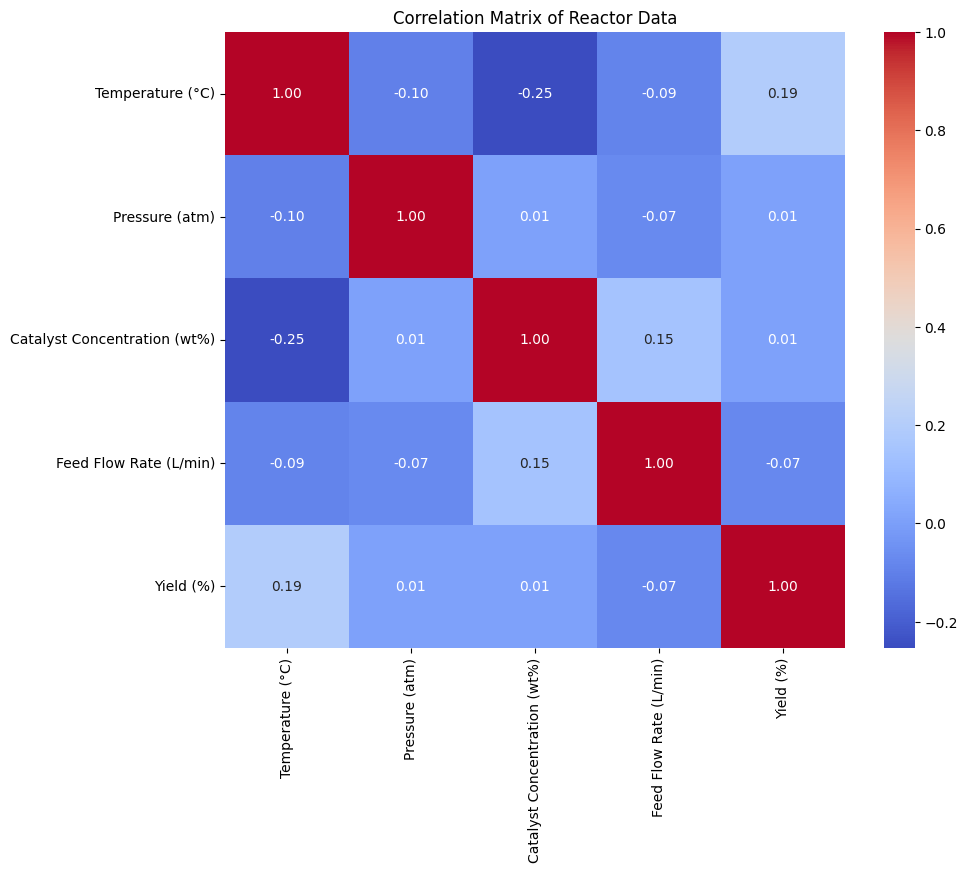

In [46]:
# plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Reactor Data')
plt.show()

## Data Visualization with Box Plot

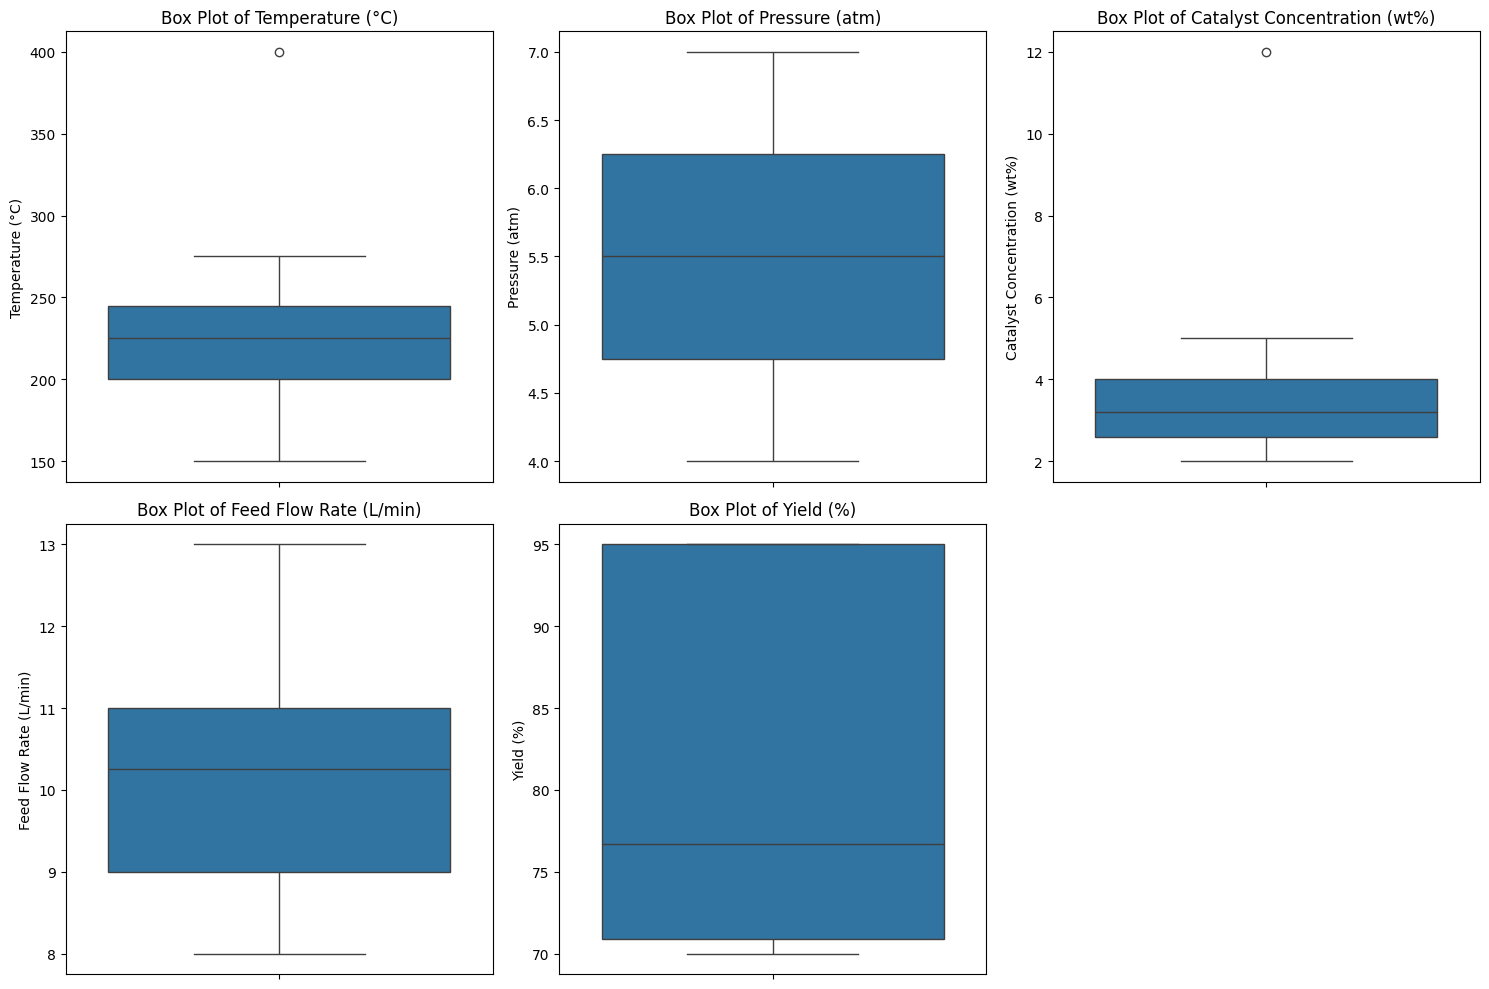

In [51]:
# prompt: create box plots for all variables in multiple plots in single figure. show outliers

num_vars = df3.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df3[var], showfliers=True)
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()